# Laboratorio 1: Análisis Básico de Datos E-commerce\n",
        "\n",
        "En este laboratorio, practicarás el análisis de datos de e-commerce usando pandas y técnicas de visualización.\n",
        "\n",
        "## Objetivos\n",
        "1. Realizar análisis exploratorio de datos\n",
        "2. Calcular métricas clave de ventas\n",
        "3. Crear visualizaciones informativas\n",
        "4. Identificar patrones en los datos\n",
        "\n",
        "## Datos\n",
        "Trabajaremos con un dataset de ventas de e-commerce que incluye información sobre:\n",
        "- Productos y categorías\n",
        "- Precios y cantidades\n",
        "- Fechas de venta\n",
        "- Canales de venta"
      ]

## Ejercicio 1: Preparación y Exploración Inicial\n",
        "\n",
        "### 1.1 Importar Bibliotecas y Configurar Ambiente\n",
        "Importa las bibliotecas necesarias y configura el ambiente de visualización."

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('Solarize_Light2')
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

print('Bibliotecas importadas correctamente')


Bibliotecas importadas correctamente


## 1.2 Cargar y Explorar los Datos\n",
        "Vamos a crear un dataset de ejemplo y realizar una exploración inicial."

In [3]:
np.random.seed(42)

data = {
        'fecha': pd.date_range('2024-01-01', periods=1000, freq='h'),
        'producto': np.random.choice(['Laptop', 'Smartphone', 'Tablet', 'Auriculares'], 1000),
        'categoria': np.random.choice(['Electrónica', 'Accesorios'], 1000),
        'precio': np.random.uniform(100, 1000, 1000).round(2),
        'cantidad': np.random.randint(1, 5, 1000),
        'canal': np.random.choice(['Online', 'Tienda'], 1000)
        }

df = pd.DataFrame(data)

# TODO: Realizar exploración inicial\n",
        "# 1. Mostrar las primeras 5 filas\n",
        "# 2. Obtener información del DataFrame\n",
        "# 3. Calcular estadísticas descriptivas\n",
        "# 4. Verificar valores únicos en las columnas categóricas

In [13]:
print('Primeras 5 filas del DataFrame:')
df.head()

print('Información del DataFrame:')
display(df.info())

print('\nEstadísticas descriptivas:')
display(df.describe())

print('\nValores únicos por columna:')
for columna in ['producto', 'categoria','canal']:
    print(f'\n{columna.title()}:')
    print(df[columna].value_counts())


Primeras 5 filas del DataFrame:
Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   fecha      1000 non-null   datetime64[ns]
 1   producto   1000 non-null   object        
 2   categoria  1000 non-null   object        
 3   precio     1000 non-null   float64       
 4   cantidad   1000 non-null   int64         
 5   canal      1000 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 47.0+ KB


None


Estadísticas descriptivas:


,fecha,precio,cantidad
count,1000,1000.00,1000.00
mean,2024-01-21 19:29:59.999999744,556.32,2.51
min,2024-01-01 00:00:00,102.90,1.00
25%,2024-01-11 09:45:00,316.96,1.00
50%,2024-01-21 19:30:00,566.86,3.00
75%,2024-02-01 05:15:00,784.42,4.00
max,2024-02-11 15:00:00,999.47,4.00
std,NaN,262.97,1.13



Valores únicos por columna:

Producto:
producto
Auriculares    280
Laptop         258
Tablet         232
Smartphone     230
Name: count, dtype: int64

Categoria:
categoria
Electrónica    526
Accesorios     474
Name: count, dtype: int64

Canal:
canal
Online    514
Tienda    486
Name: count, dtype: int64


## Ejercicio 2: Análisis de Ventas\n",

### 2.1 Calcular Métricas de Ventas\n",
        "Calcula las métricas básicas de ventas y crea un resumen."
        
        # TODO: Calcular métricas de ventas\n",
        "# 1. Crear columna de ventas (precio * cantidad)\n",
        "# 2. Calcular ventas totales\n",
        "# 3. Calcular ventas por categoría\n",
        "# 4. Calcular ticket promedio\n",
        "# 5. Identificar los productos más vendidos\n"

In [5]:
df['ventas'] = df['precio'] * df['cantidad']

ventas_totales = df['ventas'].sum()

ventas_por_categoria = df.groupby('categoria')['ventas'].sum()

ticket_promedio = df['ventas'].mean()

productos_mas_vendidos_cantidad = df.groupby('producto')['cantidad'].sum().sort_values(ascending=False)

print("Ventas totales:", ventas_totales)
print("\nVentas por categoría:\n", ventas_por_categoria)
print("\nTicket promedio:", ticket_promedio)
print("\nProductos más vendidos por cantidad:\n", productos_mas_vendidos_cantidad)



Ventas totales: 1400700.02

Ventas por categoría:
 categoria
Accesorios    681125.63
Electrónica   719574.39
Name: ventas, dtype: float64

Ticket promedio: 1400.70002

Productos más vendidos por cantidad:
 producto
Auriculares    725
Laptop         620
Tablet         593
Smartphone     571
Name: cantidad, dtype: int64


### 2.2 Visualizar Distribución de Ventas\n",
        "Crea visualizaciones para entender la distribución de las ventas.

    # TODO: Crear visualizaciones de ventas\n",
        "# 1. Gráfico de barras de ventas por categoría\n",
        "# 2. Gráfico de torta para distribución de ventas por producto\n",
        "# 3. Histograma de montos de venta\n",
        "# 4. Box plot de precios por categoría\n"

        

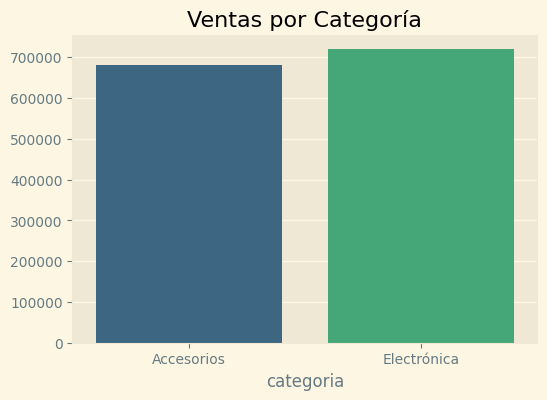

In [7]:
ventas_por_categoria = df.groupby('categoria')['ventas'].sum()
plt.figure(figsize=(6,4))
sns.barplot(
    x=ventas_por_categoria.index, y=ventas_por_categoria.values,hue=ventas_por_categoria.index, palette='viridis')
plt.title("Ventas por Categoría")
plt.show()

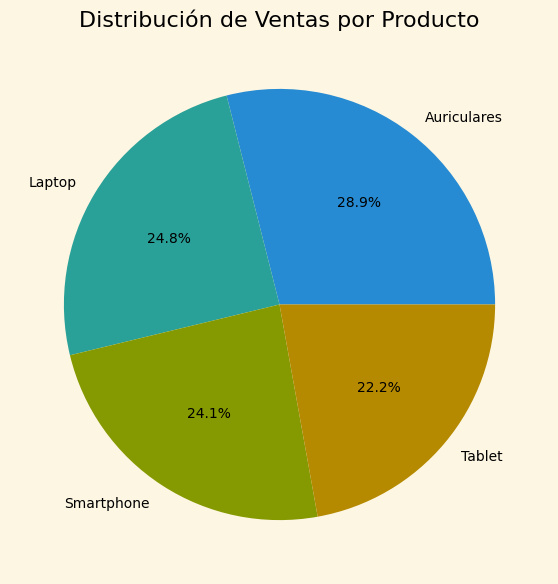

In [8]:
ventas_por_producto = df.groupby('producto')['ventas'].sum()
plt.figure(figsize=(7,7))
plt.pie(ventas_por_producto.values, labels=ventas_por_producto.index, autopct='%1.1f%%')
plt.title("Distribución de Ventas por Producto")
plt.show()

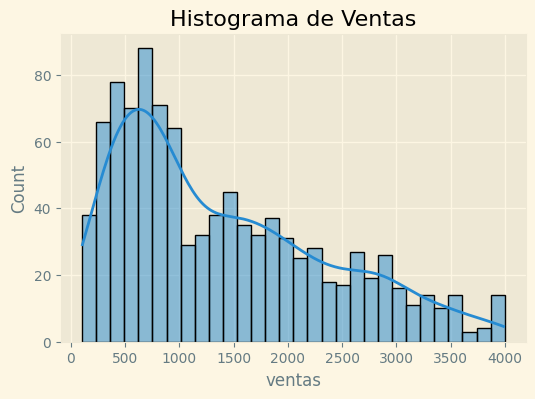

In [9]:
plt.figure(figsize=(6,4))
sns.histplot(df['ventas'], bins=30, kde=True)
plt.title("Histograma de Ventas")
plt.show()

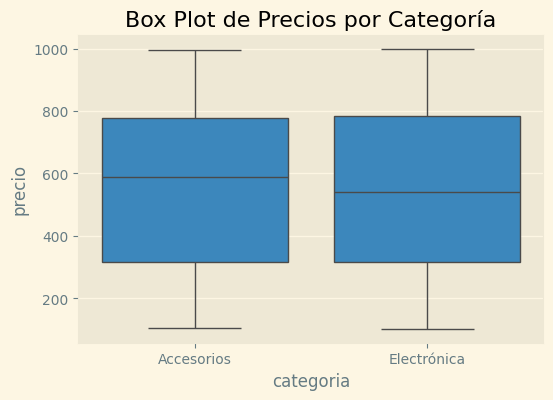

In [10]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='categoria', y='precio')
plt.title("Box Plot de Precios por Categoría")
plt.show()